In [1]:
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

Using TensorFlow backend.


In [2]:
CLASS_NAMES = ['BG', 'table']

In [3]:
class TestConfig(mrcnn.config.Config):
     NAME = "test"

     GPU_COUNT = 1
     IMAGES_PER_GPU = 1

     # # Set the number of GPUs to use along with the number of images per GPU
     BACKBONE = "resnet50"
     IMAGE_RESIZE_MODE = "square"
     IMAGE_MIN_DIM = 512
     IMAGE_MAX_DIM = 512
     
     NUM_CLASSES = len(CLASS_NAMES)

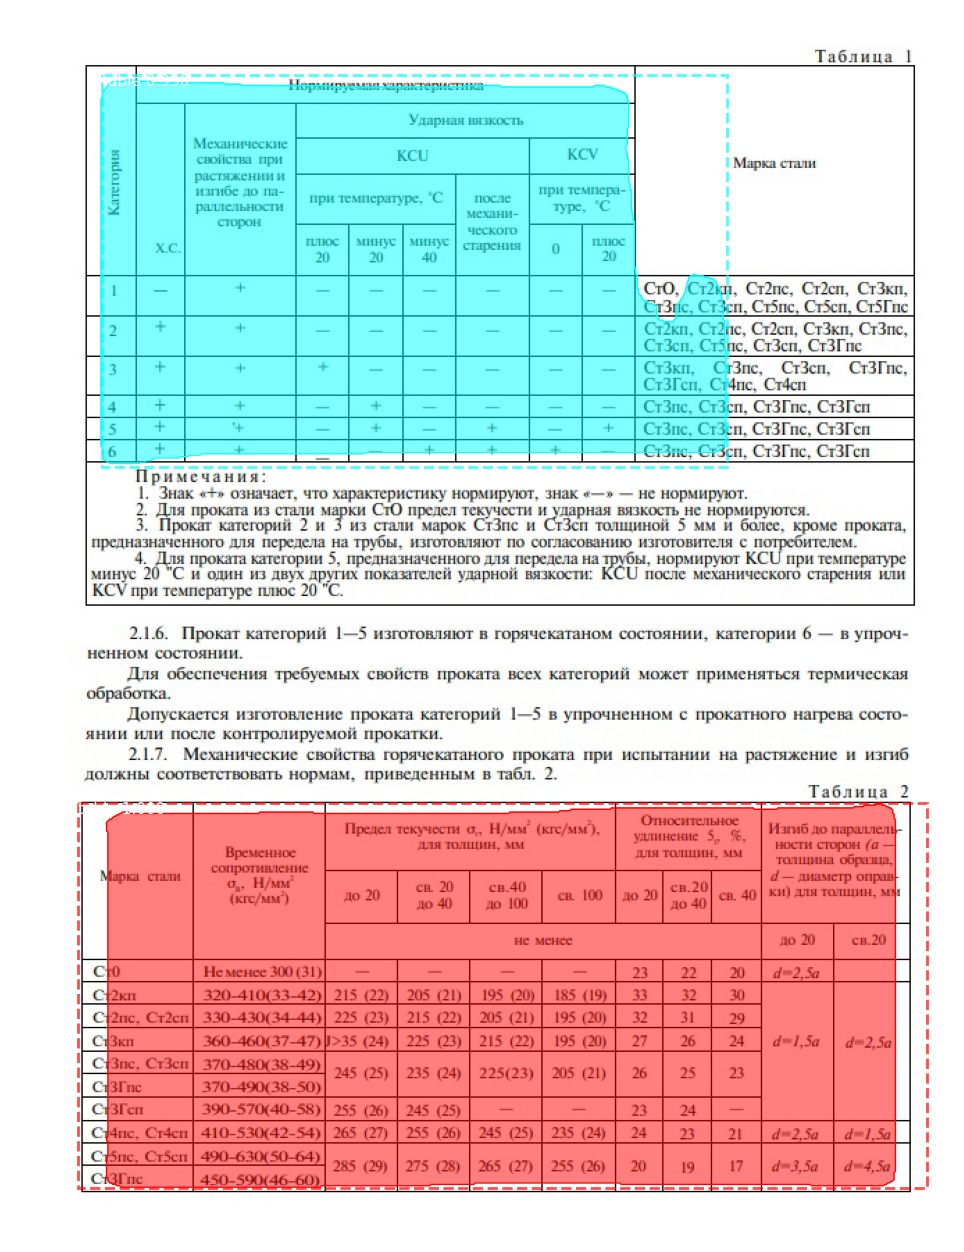

In [7]:
# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", config=TestConfig(), model_dir=os.getcwd())

# Load the weights into the model.
model.load_weights(filepath="mask_rcnn_tablebank_cfg.h5", 
                   by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread("sample.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=0)

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])
